In [1]:
import pandas as pd
loc24= pd.read_csv('24-17.01.29-02.04.csv')
print(loc24)

     Unnamed: 0   Unnamed: 1          Unnamed: 2 Unnamed: 3  \
0           NaN          NaN                 NaN        NaN   
1           NaN     SITE NO:  24 - Roseburn Park        NaN   
2           NaN        Date:            29/01/17        NaN   
3           NaN   Direction:                            NaN   
4           NaN          NaN                 NaN        NaN   
5           NaN         Hour                 P/C    P/C Kph   
6           NaN  00.00-00.59                   0          0   
7           NaN  01.00-01.59                   0          0   
8           NaN  02.00-02.59                   0          0   
9           NaN  03.00-03.59                   0          0   
10          NaN  04.00-04.59                   0          0   
11          NaN  05.00-05.59                   0          0   
12          NaN  06.00-06.59                   0          0   
13          NaN  07.00-07.59                   3         19   
14          NaN  08.00-08.59                   1       

In [2]:
loc24 = loc24.rename(columns={'Unnamed: 1': 'Hour', 'Unnamed: 2': 'P/C', 'Unnamed: 3': 'P/C Kph', 'DAILY FLOW BY HOUR': 'Ped', 'Unnamed: 5': 'Total'})
print('Roseburn Park - DAILY FLOW BY HOUR')
loc24.drop(loc24.index[[0,1,2,3,4,5]], inplace=True)
loc24.drop(loc24.columns[[0,5]], axis=1, inplace=True)
loc24.index = loc24.index - 6
newcols = {
    'P/C': 'Bike Counts', 
    'P/C Kph': 'Bike Speed', 
    'Ped': 'Pedestrian Counts'
}
loc24.rename(columns=newcols, inplace=True)
loc24

Nth Meadow Walk East 2 - DAILY FLOW BY HOUR


,Hour,Bike Counts,Bike Speed,Pedestrian Counts
0,00.00-00.59,0,0,0
1,01.00-01.59,0,0,0
2,02.00-02.59,0,0,0
3,03.00-03.59,0,0,0
4,04.00-04.59,0,0,0
5,05.00-05.59,0,0,1
6,06.00-06.59,0,0,0
7,07.00-07.59,3,19,1
8,08.00-08.59,1,13,1
9,09.00-09.59,1,15,13


In [4]:
loc24['Hourstarts'] = loc24.Hour.str.split('-').str.get(0)
loc24['Hourends'] = loc24.Hour.str.split('-').str.get(1)
loc24.drop(loc24.columns[0], axis=1, inplace=True)

In [5]:
loc24.to_csv('Loc24.csv')
loc24 = loc24.dropna(how='all')
loc24 = loc24[loc24.Hourstarts != "Direction:"]
loc24 = loc24[loc24.Hourstarts != "Total"]
loc24 = loc24[loc24.Hourstarts != "Hour"]
loc24 = loc24[loc24.Hourstarts != "Date:"]

In [6]:
pd.options.mode.chained_assignment = None

In [7]:
loc24[['Bike Counts','Hourstarts','Hourends','Bike Speed','Pedestrian Counts']] = loc24[['Bike Counts','Hourstarts','Hourends','Bike Speed','Pedestrian Counts']].apply(pd.to_numeric)
#

In [8]:
loc24day1 = loc24.iloc[0:24]
loc24day2 = loc24.iloc[24:48]
loc24day3 = loc24.iloc[48:72]
loc24day4 = loc24.iloc[72:96]
loc24day5 = loc24.iloc[96:120]
loc24day6 = loc24.iloc[120:144]
loc24day7 = loc24.iloc[144:168]
#my data is divided into 7 clean sets

In [9]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

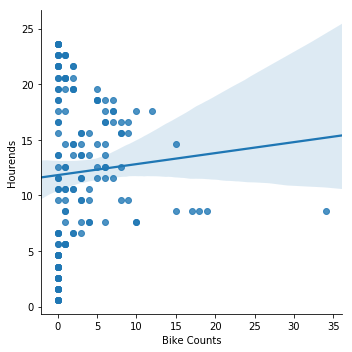

In [11]:
sns.lmplot(x='Bike Counts',y='Hourends',data=loc24)

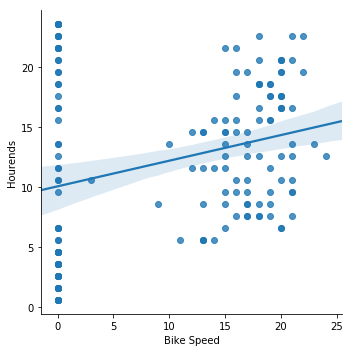

In [12]:
sns.lmplot(x='Bike Speed',y='Hourends',data=loc24)

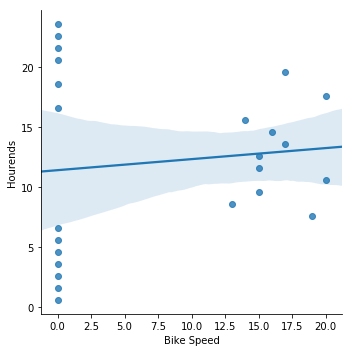

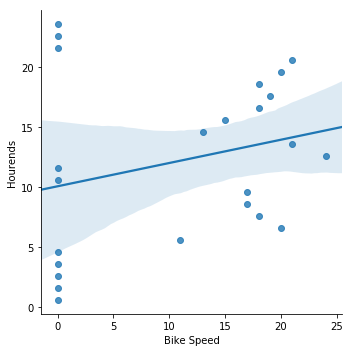

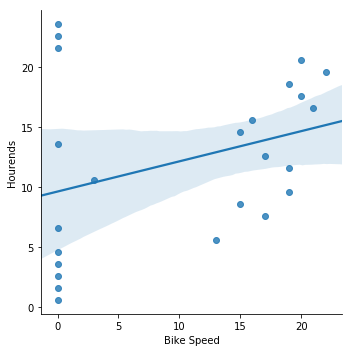

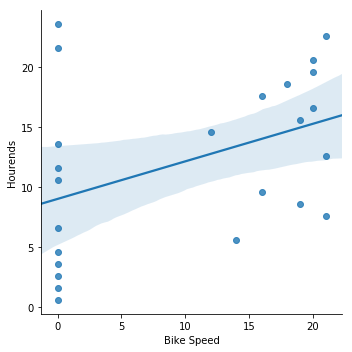

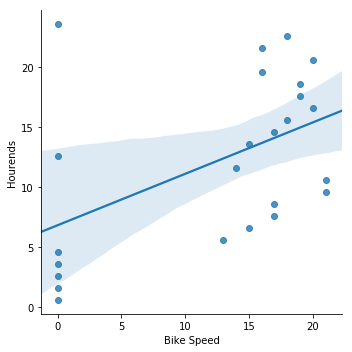

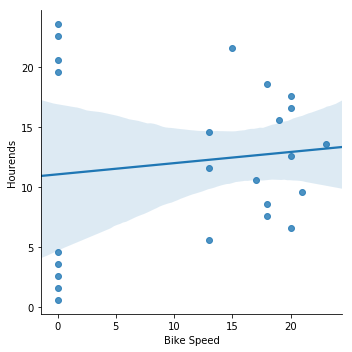

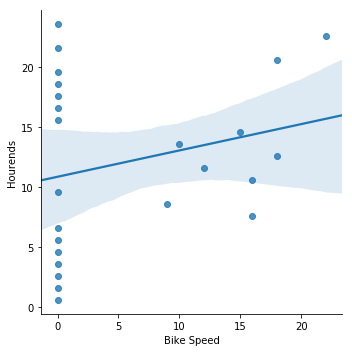

In [13]:
sns.lmplot(x='Bike Speed',y='Hourends',data=loc24day1)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc24day2)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc24day3)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc24day4)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc24day5)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc24day6)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc24day7)

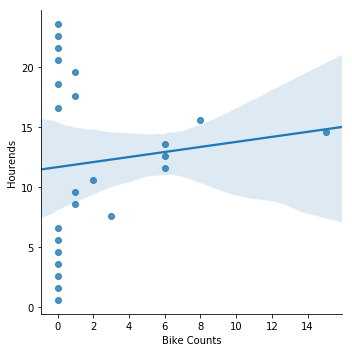

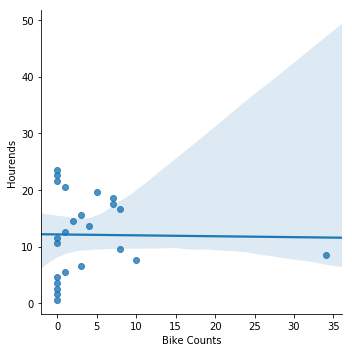

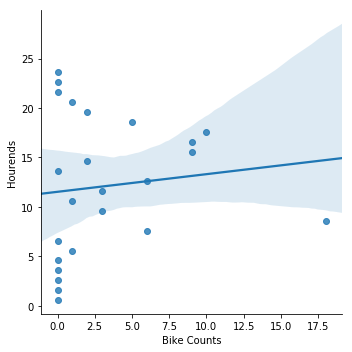

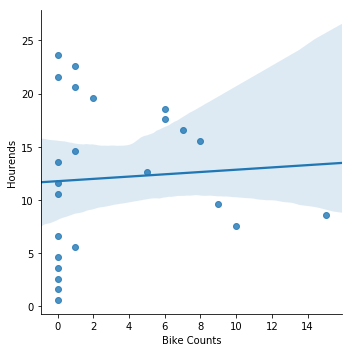

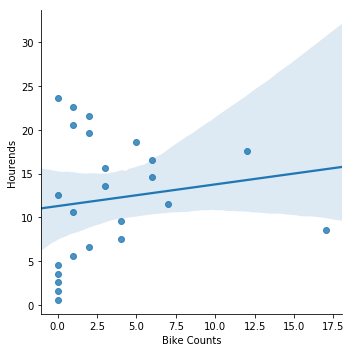

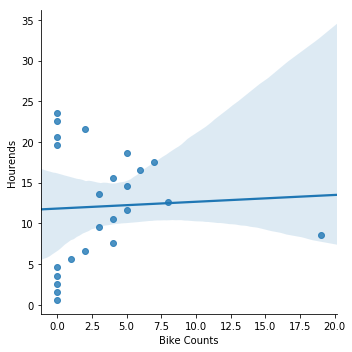

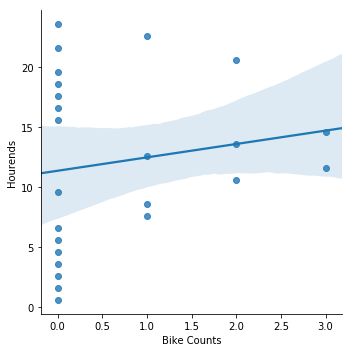

In [14]:
sns.lmplot(x='Bike Counts',y='Hourends',data=loc24day1)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc24day2)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc24day3)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc24day4)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc24day5)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc24day6)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc24day7)